In [1]:
# (1)데이터 가져오기
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
diabetes=load_diabetes()
df_X=pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y=pd.DataFrame(diabetes.target, columns=['target'])
print(df_X.shape)
print(df_y.shape)
# print(type(df_X))
# print(type(df_y))

(442, 10)
(442, 1)


In [2]:
# (2) 모델에 입력할 데이터 X 준비하기
X = df_X.values

In [3]:
# (3) 모델에 예측할 데이터 y 준비하기
Y = df_y['target'].values

In [4]:
# (4) train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [5]:
# (5) 모델 준비하기
W = np.random.rand(10)
b = np.random.rand()
# 모델함수
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [6]:
# (6) 손실함수 loss 정의하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [7]:
# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [8]:
# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.001

In [9]:
# (9) 모델 학습하기
losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 6403.4727
Iteration 2000 : Loss 5904.0225
Iteration 3000 : Loss 5819.4972
Iteration 4000 : Loss 5744.9386
Iteration 5000 : Loss 5672.8768
Iteration 6000 : Loss 5603.0956
Iteration 7000 : Loss 5535.5140
Iteration 8000 : Loss 5470.0561
Iteration 9000 : Loss 5406.6490
Iteration 10000 : Loss 5345.2220
Iteration 11000 : Loss 5285.7072
Iteration 12000 : Loss 5228.0389
Iteration 13000 : Loss 5172.1540
Iteration 14000 : Loss 5117.9913
Iteration 15000 : Loss 5065.4919
Iteration 16000 : Loss 5014.5991
Iteration 17000 : Loss 4965.2581
Iteration 18000 : Loss 4917.4160
Iteration 19000 : Loss 4871.0218
Iteration 20000 : Loss 4826.0262
Iteration 21000 : Loss 4782.3819
Iteration 22000 : Loss 4740.0430
Iteration 23000 : Loss 4698.9654
Iteration 24000 : Loss 4659.1065
Iteration 25000 : Loss 4620.4250
Iteration 26000 : Loss 4582.8814
Iteration 27000 : Loss 4546.4373
Iteration 28000 : Loss 4511.0558
Iteration 29000 : Loss 4476.7014
Iteration 30000 : Loss 4443.3395
Iteration 31000 : L

In [10]:
# (10) test 데이터에 대한 성능 확인하기
import matplotlib.pyplot as plt
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse


3298.556377210541

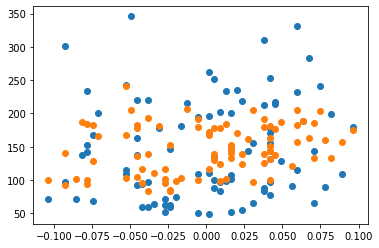

In [11]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()